## Access Radar Capricorn Bunker Group Wind Delayed Qc data in Zarr
A jupyter notebook to show how to access and plot the AODN radar_CapricornBunkerGroup_wind_delayed_qc dataset available as a [Zarr](https://zarr.dev/) dataset on S3.

More information about the dataset available [here](https://catalogue-imos.aodn.org.au/geonetwork/srv/eng/catalog.search#/metadata/742dc902-b300-4e3e-839f-04d03671aa09).

In [1]:
dataset_name = "radar_CapricornBunkerGroup_wind_delayed_qc"

In [2]:
import xarray as xr
import fsspec

## Install/Update packages and Load common functions

In [3]:
# only run once, then restart session if needed
!pip install uv

import os
import sys

def is_colab():
    try:
        import google.colab
        return True
    except ImportError:
        return False

# Get the current directory of the notebook
current_dir = os.getcwd()

# Check if requirements.txt exists in the current directory
local_requirements = os.path.join(current_dir, 'requirements.txt')
if os.path.exists(local_requirements):
    requirements_path = local_requirements
else:
    # Fall back to the online requirements.txt file
    requirements_path = 'https://raw.githubusercontent.com/aodn/aodn_cloud_optimised/main/notebooks/requirements.txt'

# Install packages using uv and the determined requirements file
if is_colab():
    xr.set_options(display_style='text')
    os.system(f'uv pip install --system -r {requirements_path}')
else:
    os.system('uv venv')
    os.system(f'uv pip install -r {requirements_path}')

Using CPython 3.12.6 interpreter at: /home/lbesnard/miniforge3/envs/AodnCloudOptimised/bin/python
Creating virtual environment at: .venv
Activate with: source .venv/bin/activate
Audited 230 packages in 19ms


In [4]:
import requests
import os
if not os.path.exists('DataQuery.py'):
  print('Downloading DataQuery.py')
  url = 'https://raw.githubusercontent.com/aodn/aodn_cloud_optimised/main/aodn_cloud_optimised/lib/DataQuery.py'
  response = requests.get(url)
  with open('DataQuery.py', 'w') as f:
      f.write(response.text)

In [5]:
from DataQuery import plot_gridded_variable, create_timeseries, plot_time_coverage

In [6]:
# remote zarr dataset
url = f's3://aodn-cloud-optimised/{dataset_name}.zarr/'
ds = xr.open_zarr(fsspec.get_mapper(url, anon=True), consolidated=True)
ds

<xarray.Dataset> Size: 4MB
Dimensions:               (LATITUDE: 64, LONGITUDE: 72, TIME: 20)
Coordinates:
  * LATITUDE              (LATITUDE) float64 512B -21.92 -21.96 ... -24.16 -24.2
  * LONGITUDE             (LONGITUDE) float64 576B 150.8 150.8 ... 153.5 153.6
  * TIME                  (TIME) datetime64[ns] 160B 2009-08-01T00:30:00 ... ...
Data variables:
    WDIR                  (TIME, LATITUDE, LONGITUDE) float64 737kB dask.array<chunksize=(5, 64, 72), meta=np.ndarray>
    WDIR_quality_control  (TIME, LATITUDE, LONGITUDE) float64 737kB dask.array<chunksize=(5, 64, 72), meta=np.ndarray>
    WWAV                  (TIME, LATITUDE, LONGITUDE) float64 737kB dask.array<chunksize=(5, 64, 72), meta=np.ndarray>
    WWAV_quality_control  (TIME, LATITUDE, LONGITUDE) float64 737kB dask.array<chunksize=(5, 64, 72), meta=np.ndarray>
    WWDS                  (TIME, LATITUDE, LONGITUDE) float64 737kB dask.array<chunksize=(5, 64, 72), meta=np.ndarray>
    WWDS_quality_control  (TIME, LATITUDE, LONGITUDE) float64 737kB dask.array<chunksize=(5, 64, 72), meta=np.ndarray>
Attributes: (12/38)
    Conventions:                   CF-1.5,IMOS-1.2
    abstract:                      The ACORN facility is producing NetCDF fil...
    acknowledgment:                Data was sourced from the Integrated Marin...
    author:                        Wyatt, Lucy
    author_email:                  lucy.wyatt@jcu.edu.au
    citation:                      The citation in a list of references is: I...
    ...                            ...
    site_code:                     CBG, Capricorn Bunker Group
    source:                        Terrestrial HF radar
    ssr_Stations:                  Tannum Sands (TAN), LEI (LEI)
    time_coverage_end:             2009-08-01T15:30:00Z
    time_coverage_start:           2009-08-01T15:30:00Z
    title:                         IMOS ACORN Capricorn Bunker Group (CBG), o...

## Plot time coverage

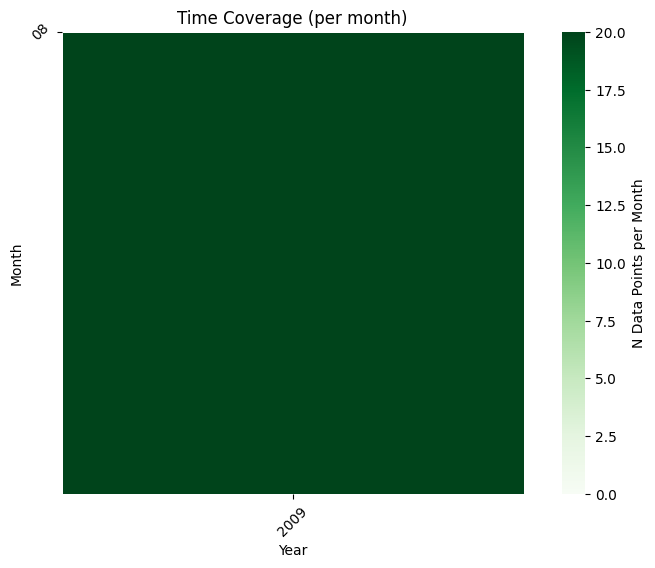

In [7]:
plot_time_coverage(ds, time_var="TIME")

## Plot a gridded variable

Nearest date in dataset: <xarray.DataArray 'TIME' ()> Size: 8B
array('2009-08-01T00:30:00.000000000', dtype='datetime64[ns]')
Coordinates:
    TIME     datetime64[ns] 8B 2009-08-01T00:30:00
Attributes:
    axis:             T
    comment:          Given time lies at the middle of the 1 hour averaging p...
    local_time_zone:  8.0
    long_name:        time
    standard_name:    time
    valid_max:        999999.0
    valid_min:        0.0
Variable Long Name: Direction towards which the wind is blowing based on short wave direction


/home/lbesnard/github_repo/aodn_cloud_optimised/notebooks/DataQuery.py:838: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


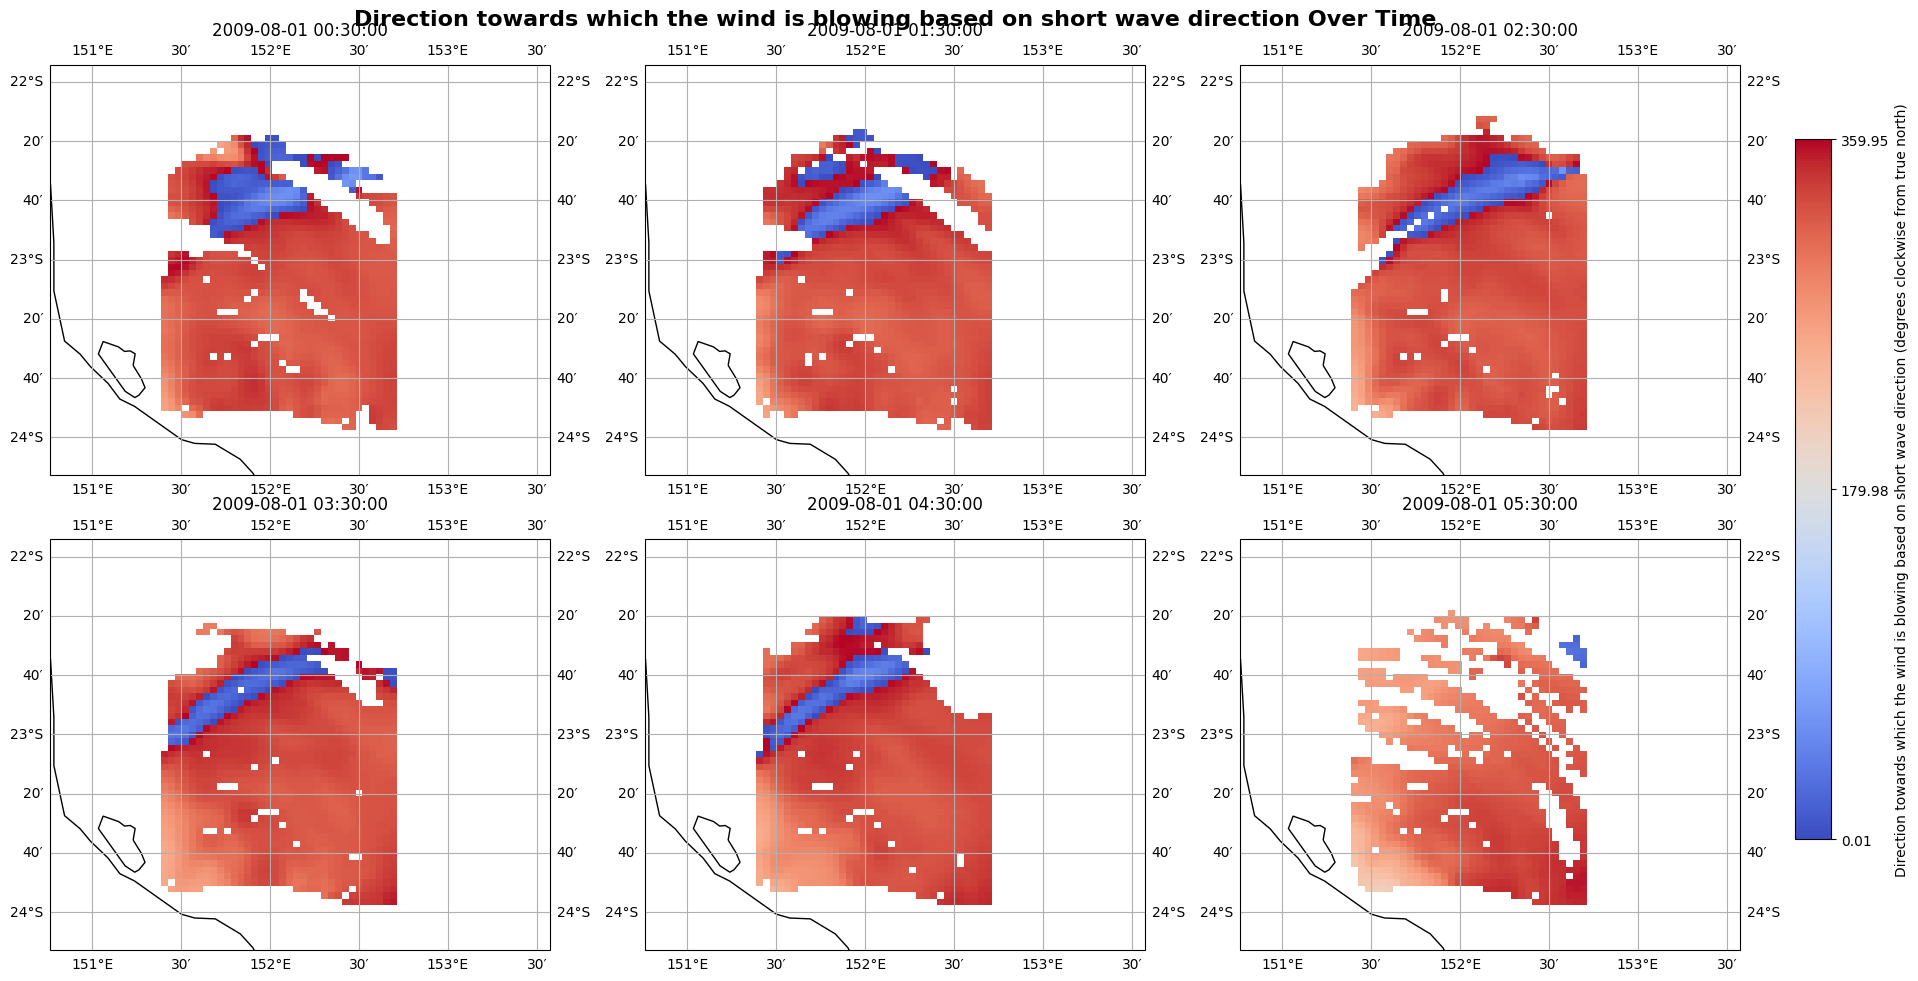

In [8]:
plot_gridded_variable(ds, start_date='2009-08-01', var_name='WDIR', n_days=6, coastline_resolution="50m", time_name="TIME", lat_name="LATITUDE", lon_name="LONGITUDE")